## Материалы
- Дашборд: https://public.tableau.com/app/profile/mary.godunova/viz/Book2_16853015909760/Dashboard1?publish=yes
- Презентация: https://drive.google.com/drive/folders/1OjFy65xvqSsw7s3cbBA6B7WdCWu6KgT7?usp=sharing

0. Выгрузка данных 
1. Предобработка данных: 
- Поиск пропусков
- Поиск дубликатов
3. Исследовательский анализ (общее исследование поведения пользователей) по следующим метрикам:
- Retention rate
- Время проведенное в приложении (по сессиям)
- Частоту
- Конверсию
4. Основная цель исследования:

4.1 Сегментирование пользователей на группы и подсчет следующих показателей для каждой из групп:
- Retention rate
- Конверсия в целевое действие 
4.2 Ответы на вопросы заказчика:
1) Какая категория пользователей является лучшей по метрике удержания?
2) Какая категория пользоватей является лучшей по метрике конверсии?

5. Гипотезы:

1) Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Проверить гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.

2) После исследования общего поведения пользователей у нас будет определенное количество групп, различное по времени, проведенному в приложении. Если сравнить группу с минимальным временем пользования приложением и группу с максимальным временем пользования, эти группы продемонстрируют одинаковую конверсию в звонок по телефону.

6. Общий вывод с рекомендациями

## Предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import math as mth
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
from scipy import stats as st

#столбцы и строки полностью, формат округлен
pd.set_option('display.max_columns', None)

In [2]:
sources = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')
df = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')

In [3]:
display(df.columns)
display(sources.columns)

Index(['event.time', 'event.name', 'user.id'], dtype='object')

Index(['userId', 'source'], dtype='object')

In [4]:
display(df.info)
display(sources.info)

<bound method DataFrame.info of                        event.time   event.name  \
0      2019-10-07 00:00:00.431357  advert_open   
1      2019-10-07 00:00:01.236320  tips_show     
2      2019-10-07 00:00:02.245341  tips_show     
3      2019-10-07 00:00:07.039334  tips_show     
4      2019-10-07 00:00:56.319813  advert_open   
...                           ...          ...   
74192  2019-11-03 23:53:29.534986  tips_show     
74193  2019-11-03 23:54:00.407086  tips_show     
74194  2019-11-03 23:56:57.041825  search_1      
74195  2019-11-03 23:57:06.232189  tips_show     
74196  2019-11-03 23:58:12.532487  tips_show     

                                    user.id  
0      020292ab-89bc-4156-9acf-68bc2783f894  
1      020292ab-89bc-4156-9acf-68bc2783f894  
2      cf7eda61-9349-469f-ac27-e5b6f5ec475c  
3      020292ab-89bc-4156-9acf-68bc2783f894  
4      cf7eda61-9349-469f-ac27-e5b6f5ec475c  
...                                     ...  
74192  28fccdf4-7b9e-42f5-bc73-439a265f20e9  

<bound method DataFrame.info of                                     userId  source
0     020292ab-89bc-4156-9acf-68bc2783f894  other 
1     cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex
2     8c356c42-3ba9-4cb6-80b8-3f868d0192c3  yandex
3     d9b06b47-0f36-419b-bbb0-3533e582a6cb  other 
4     f32e1e2a-3027-4693-b793-b7b3ff274439  google
...                                    ...     ...
4288  b86fe56e-f2de-4f8a-b192-cd89a37ecd41  yandex
4289  424c0ae1-3ea3-4f1e-a814-6bac73e48ab1  yandex
4290  437a4cd4-9ba9-457f-8614-d142bc48fbeb  yandex
4291  c10055f0-0b47-477a-869e-d391b31fdf8f  yandex
4292  d157bffc-264d-4464-8220-1cc0c42f43a9  google

[4293 rows x 2 columns]>

Проверим данные на наличие пропусков:

In [5]:
print(sources.isna().sum())
print(df.isna().sum())

userId    0
source    0
dtype: int64
event.time    0
event.name    0
user.id       0
dtype: int64


Рассмотрим типы событий, которые могут совершать юзеры. Можно заметить, что два типа событий ("contacts_show" и "show_contacts") представляют из себя одно событие (показ контактов), поэтому их можно объединить в одно:

In [6]:
df['event.name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7', 'show_contacts'], dtype=object)

In [7]:
df.loc[df['event.name']=='show_contacts', 'event.name'] = 'contacts_show'

Переименуем столбец с именами юзеров в таблице с источниками в соответствии с тем же столбцом в основной таблице:

In [8]:
sources = sources.rename(columns={'userId':'user.id'})

In [9]:
df = df.merge(sources, on='user.id', how='left')

In [10]:
df

,event.time,event.name,user.id,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
...,...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google
74194,2019-11-03 23:56:57.041825,search_1,20850c8f-4135-4059-b13b-198d3ac59902,google
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google


Создадим два столбца из одного столбца с датой каждого события. В один столбец запишем первоначальные даты событий без милисекунд, так как они незнчимы (физически невозможно совершить несколько событий с разницей в милисекунду). В другой столбец запишем только даты событий с точностью до дней, чтобы в дальнейшем было легче искать различные метрики.

In [11]:
df['event.time'] = pd.to_datetime(df['event.time'], format='%Y-%m-%d %H:%M:%S')
df['all_time'] = df['event.time']
df['all_time'] = df['event.time'].dt.strftime("%Y-%m-%d %H:%M:%S")
df['event.time'] = df['event.time'].dt.strftime("%Y-%m-%d")
df['event.time'] = pd.to_datetime(df['event.time'], format='%Y-%m-%d')
df['all_time'] = pd.to_datetime(df['all_time'], format='%Y-%m-%d %H:%M:%S')

После преобразования проверим наличие дубликатов. Дубликаты составляют менее 10%, поэтому мы не будем их обрабатывать и оставим в датасете.

In [12]:
df.duplicated().sum()

1143

Данные не содержат пропусков и содержат незначительное (относительного общего количества наблюдений) количество дубликатов, таким образом, данные готовы к анализу.

## Исследовательский анализ данных

### Расчет Retention rate

In [13]:
start = df.groupby(['user.id'])['event.time'].min()
start.name = 'start_time'
retention = df.join(start, on='user.id')
retention['lifetime'] = (retention['event.time'] - retention['start_time']).dt.days
retention_table = retention.pivot_table(index=['start_time'], columns='lifetime', values='user.id', aggfunc='nunique')

In [14]:
cohort_sizes = (
    retention.groupby('start_time').agg({'user.id': 'nunique'})
    .rename(columns={'user.id': 'cohort_size'})
)

cohort_sizes.head()

,cohort_size
start_time,
2019-10-07,204
2019-10-08,167
2019-10-09,176
2019-10-10,174
2019-10-11,136


In [15]:
result_grouped  = cohort_sizes.merge(retention_table, on='start_time', how='left').fillna(0)

In [16]:
result_grouped = result_grouped.div(
    result_grouped['cohort_size'], axis=0
).drop(columns=['cohort_size'])

result_grouped.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
start_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-07,1.0,0.181373,0.102941,0.107843,0.068627,0.058824,0.039216,0.078431,0.063725,0.049020,0.068627,0.039216,0.019608,0.039216,0.058824,0.044118,0.053922,0.039216,0.029412,0.039216,0.009804,0.019608,0.039216,0.029412,0.019608,0.049020,0.019608,0.014706
2019-10-08,1.0,0.179641,0.119760,0.101796,0.035928,0.035928,0.065868,0.047904,0.065868,0.053892,0.059880,0.041916,0.017964,0.047904,0.029940,0.035928,0.029940,0.035928,0.011976,0.035928,0.047904,0.017964,0.023952,0.035928,0.029940,0.029940,0.029940,0.000000
2019-10-09,1.0,0.096591,0.085227,0.056818,0.056818,0.079545,0.056818,0.056818,0.056818,0.051136,0.022727,0.022727,0.039773,0.039773,0.045455,0.022727,0.022727,0.011364,0.011364,0.028409,0.017045,0.011364,0.028409,0.005682,0.017045,0.028409,0.000000,0.000000
2019-10-10,1.0,0.137931,0.074713,0.103448,0.074713,0.091954,0.063218,0.074713,0.063218,0.057471,0.040230,0.045977,0.045977,0.063218,0.022989,0.040230,0.034483,0.068966,0.040230,0.028736,0.017241,0.034483,0.022989,0.017241,0.017241,0.000000,0.000000,0.000000
2019-10-11,1.0,0.088235,0.080882,0.132353,0.095588,0.066176,0.058824,0.073529,0.022059,0.000000,0.051471,0.036765,0.044118,0.044118,0.036765,0.022059,0.036765,0.066176,0.036765,0.029412,0.029412,0.029412,0.022059,0.022059,0.000000,0.000000,0.000000,0.000000


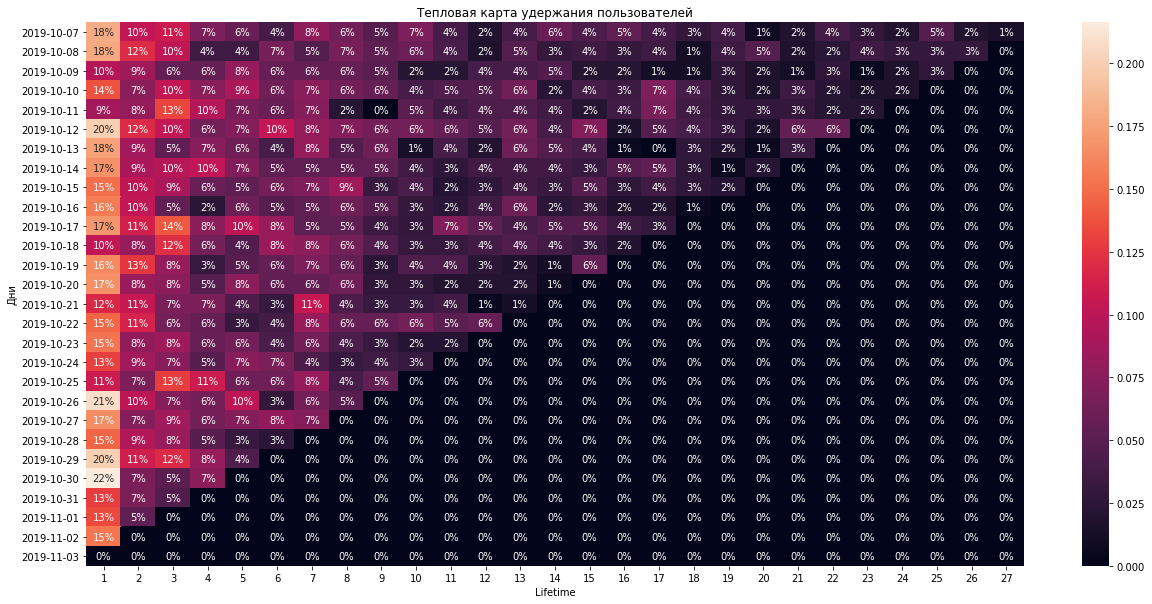

In [17]:
plt.figure (figsize = (21,10))
fig = sns.heatmap(result_grouped.drop(columns=[0]), annot= True, fmt = '.0%', yticklabels=result_grouped.index.date)
plt.title('Тепловая карта retention rate')
plt.title('Тепловая карта удержания пользователей')  # название графика
plt.xlabel('Lifetime')
plt.ylabel('Дни')
plt.show()

Можно заметить, что коэффициент удержания уменьшается достаточно постепенно, без резких падений, поэтому можно сделать вывод, что серьезных проблем в целом с удержанием пользвоателей не наблюдается. Наиболее сильное снижение показателя заметно от 1 ко 2 лайфтайму (примерно 10%). 
Но важным будет проанализировать этот же показатель для выделенных группп пользователей.

### Анализ времени, проведенного в приложении

Выделим сессии для анализа длительности сессий пользования приложением. В качестве сессий рассмотрим длительность пользования в 30 минут, так как это время можно считать одновременно не слишком длительным (в таком случае будет слишком мало сессий), но и не слишком малым, чтобы понять, что юзер мог совершить сразу несколько действий в приложении. 

In [18]:
df = df.sort_values(['user.id', 'event.time'])
time = ((df.groupby('user.id')['event.time'].diff() > pd.Timedelta('30Min')).cumsum())
df['session.id'] = df.groupby(['user.id', time], sort=False).ngroup() + 1
df.head()

,event.time,event.name,user.id,source,all_time,session.id
805,2019-10-07,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45,1
806,2019-10-07,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:40:31,1
809,2019-10-07,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:41:05,1
820,2019-10-07,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:43:20,1
830,2019-10-07,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:45:30,1


In [19]:
sessions = pd.DataFrame(df.groupby(['user.id', 'session.id'])['all_time'].
     max() - df.groupby(['user.id', 'session.id'])['all_time'].min()).reset_index()
sessions['session_min'] = round((sessions['all_time'].astype('timedelta64[s]')/60),2)
sessions = sessions.drop(columns=['all_time'])
sessions.head()

,user.id,session.id,session_min
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,9.93
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2,8.45
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3,15.00
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,12.63
4,00157779-810c-4498-9e05-a1e9e3cedf93,5,25.35


In [20]:
print(sessions['session_min'].median())
print(sessions['session_min'].mean())

11.8
83.03343865933222


In [21]:
time = (sessions.groupby(['user.id'])['session_min'].agg({'sum', 'mean'}).reset_index())
time.columns = ['user.id', 'mean', 'sum']
display(time.head())
print(time['mean'].mean())

,user.id,mean,sum
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,46.01,11.502500
1,00157779-810c-4498-9e05-a1e9e3cedf93,196.23,32.705000
2,00463033-5717-4bf1-91b4-09183923b9df,24.70,24.700000
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,1293.52,215.586667
4,00551e79-152e-4441-9cf7-565d7eb04090,9.32,3.106667


151.19319590030278


In [22]:
time = (sessions.groupby(['user.id'])['session_min'].agg({'sum', 'median'}).reset_index())
time.columns = ['user.id', 'median', 'sum']
df = df.merge(time, on='user.id', how='left')

In [23]:
print(df['median'].median())
print(df['median'].max())
print(df['median'].min())

34.84
1410.73
0.0


Медианное значение длины сессии составляет около 12 минут, а среднее значение - около 83. Таким образом, присутствует относительно сильное различие между медианой и средним, что говорит о наличии выбросов, смещающих значение среднего онтосительно центра распределения, поэтому медиана является более надежным ориентиром для анализа. Так, наибольшее медианное значение на пользователя составляет 9992 минуты, а минимальное - 0 (что недостоверно, так как сессия не может продолжаться 0 секунд). А значит, даже медианные значения по каждому пользователю могут служить как аномальные, что вновь подтверждает важность анализа медианных, а не серединных значений выборки.

In [24]:
sessions['session_min'].describe()

count    7817.000000
mean     83.033439  
std      190.168100 
min      0.000000   
25%      2.470000   
50%      11.800000  
75%      48.750000  
max      1417.470000
Name: session_min, dtype: float64

### Анализ конверсии

Рассмотрим, какая доля пользователей от общего числа совершили целевое действие (просмотр контактов):

In [25]:
len(df[df['event.name'] == "contacts_show"].groupby('user.id').agg('nunique'))/len(df.groupby('user.id').agg('nunique'))

0.22851153039832284

Около 23% пользователей просмотрели контакты в приложении. Хотя это меньшая часть юзеров, это не слишком маленькая доля, учитывая, что был исследован набольшой временной диапазон (несколько недель).

### Анализ частоты совершения действий

Рассмотрим частоту совершения действий с разбивкой по дням:

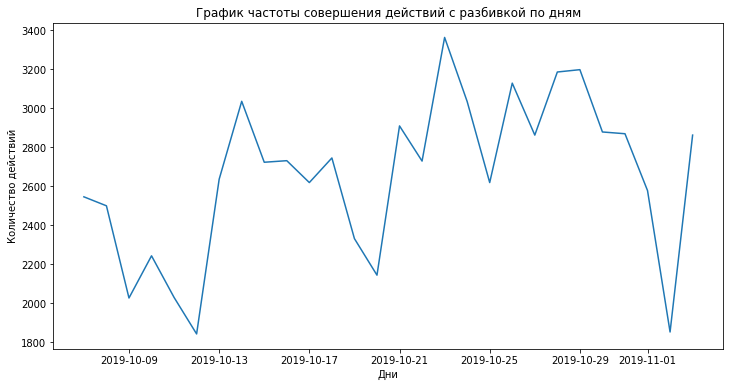

In [26]:
users_by_day = df.groupby('event.time').agg({'user.id':'count'}).reset_index()
plt.figure(figsize=(12, 6))
plt.plot(users_by_day['event.time'], users_by_day['user.id'])
plt.title('График частоты совершения действий с разбивкой по дням')
plt.ylabel('Количество действий')
plt.xlabel('Дни')
plt.show()

Можно заметить, что больше всего событий совершены во-первых в промежутке с 9 сентября по 20 сентября, при этом с 18 сентября по 20 сентября наблюдается сильное снижение активности. Во-вторых, с 20 сентября по 2 октября (с переменным успехом) наблюдается высокая активность. Подводя итог, можно сказать, что активность в приложении, хотя и нестабильна, снижается незначительно и в целом не падаетна долгие промежутки времени.

В целом поведение пользователей можно охарактеризовать как достаточно стабильное. Судя по коэффициенту конверсии и динамике снижения значений метрики удержания можно сделать вывод, что особых всплесков или упадков активности не наблюдается, но чтобы точнее диагностировать различия в поведении пользователей, нужно разбить юзеров на различные группы.

In [27]:
df.head()

,event.time,event.name,user.id,source,all_time,session.id,median,sum
0,2019-10-07,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45,1,11.28,46.01
1,2019-10-07,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:40:31,1,11.28,46.01
2,2019-10-07,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:41:05,1,11.28,46.01
3,2019-10-07,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:43:20,1,11.28,46.01
4,2019-10-07,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:45:30,1,11.28,46.01


## Сегментирование пользователей

In [28]:
first_event = pd.DataFrame(df.groupby('user.id')['event.time'].min())
first_event = first_event.rename(columns={'event.time':'first.event'})
df = df.join(first_event, on = 'user.id')

In [29]:
df['first.event'] = pd.to_datetime(df['first.event'],unit='d') - pd.to_timedelta(df['first.event'].dt.dayofweek, unit='d')

В качестве признака для сегментации была выбрана длительность сессий пользования приложением. С помощью медианы пользования мы разбили пользователей на две группы: 1)медианная длительность составляет не более 30 минут, 2)медианная длительность пользования составляет более 30 минут и менее часа. 3)медианная длительность составляет более часа. Такое разбиение позволит проанализировать исследуемые метрики (удержание, конверсию) среди менее активных и более активных юзеров, так как предположительно граница в 30 минут и час (так как это длительности 1 и 2 аут-сессий соответственно) является оптимальной для разграничения (за полчаса юзер вполне может определить, будет ли он далее пользоваться приложением, за час пользователь подходит ли ему приложение и будет ли он в дальнейшем в него заходить). 

In [30]:
df['segment'] = 1
df.loc[df['median']<=30 ,'segment']=0
df.loc[df['median']>=60 ,'segment']=2

In [31]:
group0 = df.query('segment == 0')
group1 = df.query('segment == 1')
group2 = df.query('segment == 2')

### Retention rate

In [32]:
def get_retention(
    result_raw):
    start = result_raw.groupby(['user.id'])['event.time'].min()
    start.name = 'start_time'
    result_raw = result_raw.join(start, on='user.id')
    result_raw['lt'] = (
        result_raw['event.time']- result_raw['start_time']
    ).dt.days

    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(
        index=['start_time'], columns='lt', values='user.id', aggfunc='nunique'
    )
    cohort_sizes = (
        result_raw.groupby('start_time')
        .agg({'user.id': 'nunique'})
        .rename(columns={'user.id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on='start_time', how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)


    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания и сырые данные
    # сырые данные пригодятся, если нужно будет отыскать ошибку в расчётах
    return result_raw, result_grouped

In [33]:
retention_raw0, retention0 = get_retention(group0)
retention_raw1, retention1 = get_retention(group1)
retention_raw2, retention2 = get_retention(group2)

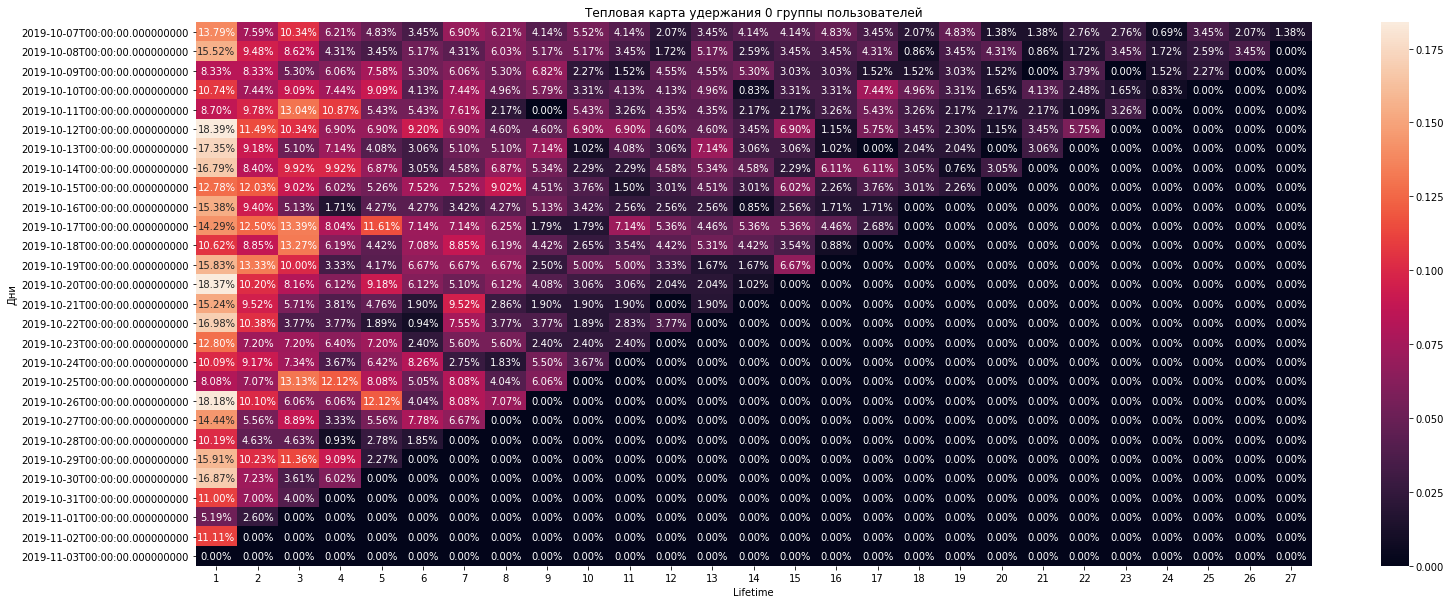

In [34]:
plt.figure (figsize = (25,10))  # задаём размер графика
sns.heatmap(
    retention0.drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания 0 группы пользователей')  # название графика
plt.xlabel('Lifetime')
plt.ylabel('Дни')
plt.show()

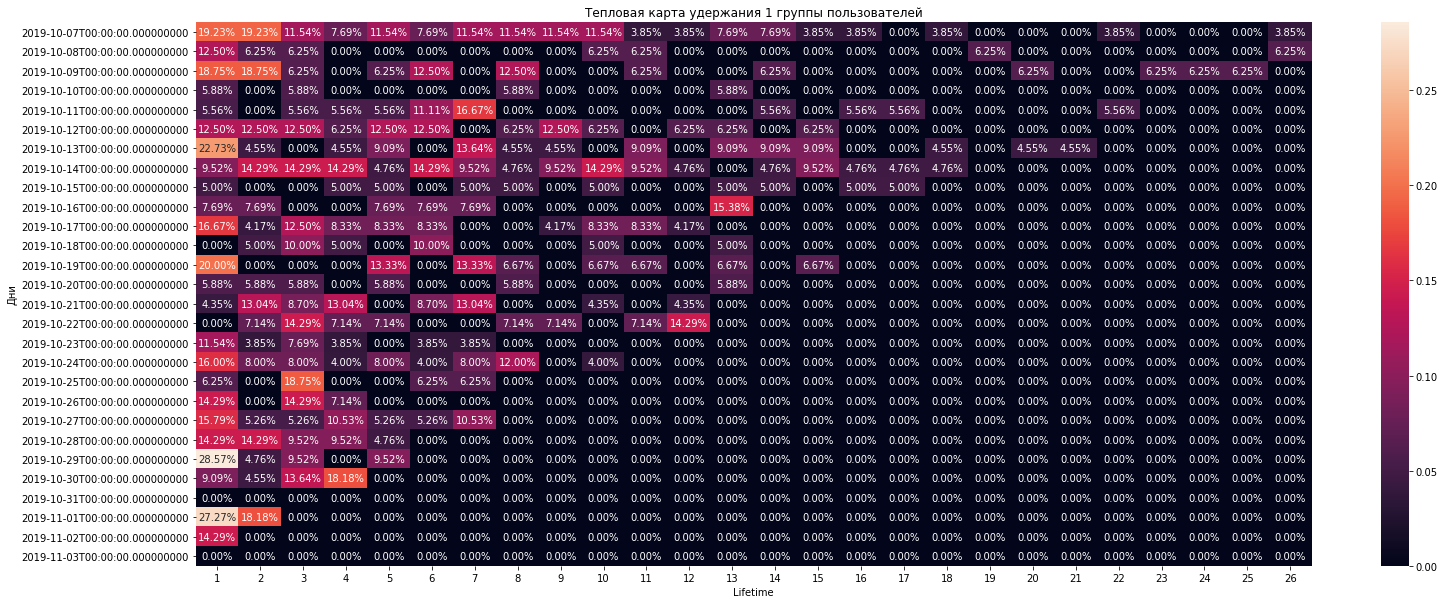

In [35]:
plt.figure (figsize = (25,10))  # задаём размер графика
sns.heatmap(
    retention1.drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания 1 группы пользователей')  # название графика
plt.xlabel('Lifetime')
plt.ylabel('Дни')
plt.show()

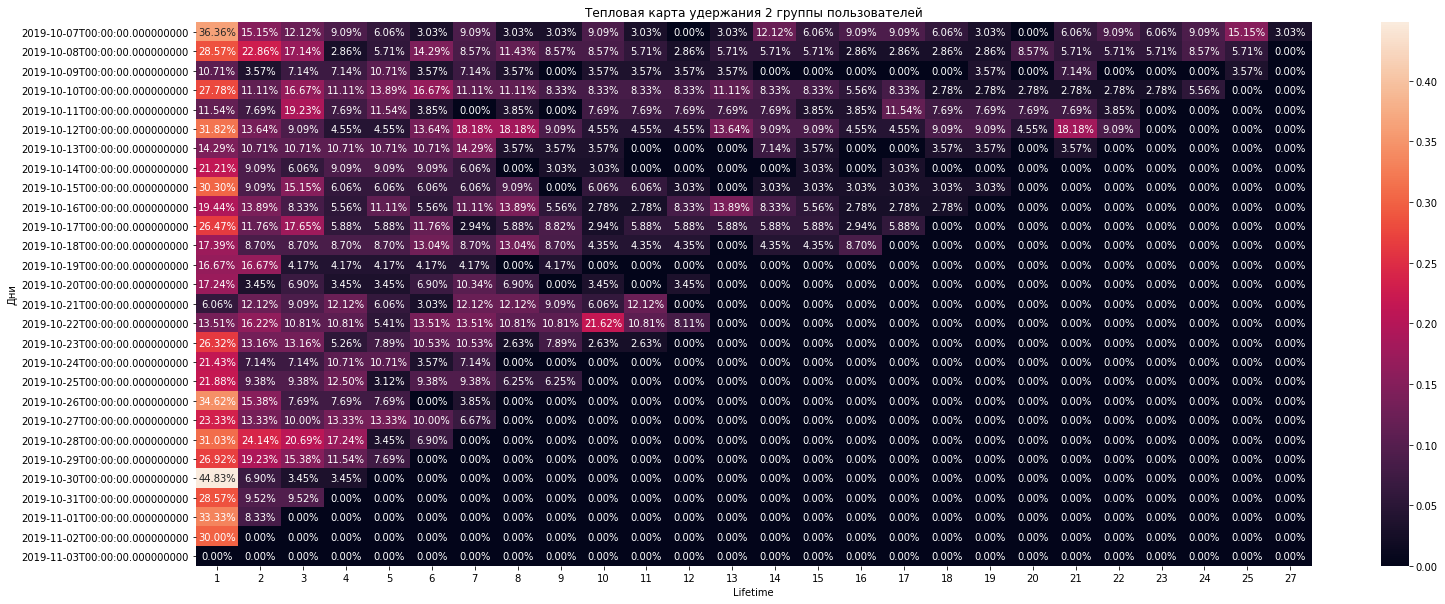

In [36]:
plt.figure (figsize = (25,10))  # задаём размер графика
sns.heatmap(
    retention2.drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания 2 группы пользователей')  # название графика
plt.xlabel('Lifetime')
plt.ylabel('Дни')
plt.show()

- В первой группе (медианное время использования приложения не более 30 минут) коэффициент удержания пользователей становится меньше 10% уже ко 2 дню, при этом далее пользователи продолжают возвращаться примерно с одинаковым (незначительно снижающимся) коэффициентом удержания
- Во второй группе  (медианное время использования приложения от получаса до часа) коэффициент удержания имеет большой диапазон значений (от 5 до 30 %). Пользователи возвращаются в приложение реже и менее стабильно, чем в 0 группе
-  В третьей группе  (медианное время использования приложения более часа) коэффициент удержания значительно выше, чем в двух других группах (на 10-20%), пользователи возвращаются менее часто, чем в 0 группе, но более стабильно, чем в 1 группе (относительные внутригрупповые значения). В абсолютных значениях коэффициент удержания у данной группы самый высокий

### Конверсия

<BarContainer object of 3 artists>

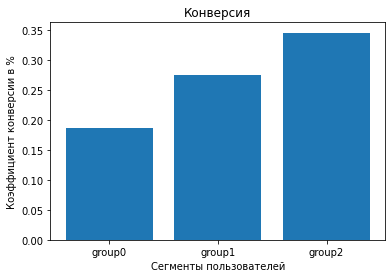

In [37]:
conversion = {}
conversion['group0']=len(group0[group0['event.name'] == "contacts_show"].groupby('user.id').agg('nunique'))/len(group0.groupby('user.id').agg('nunique'))
conversion['group1']=len(group1[group1['event.name'] == "contacts_show"].groupby('user.id').agg('nunique'))/len(group1.groupby('user.id').agg('nunique'))
conversion['group2']=len(group2[group2['event.name'] == "contacts_show"].groupby('user.id').agg('nunique'))/len(group2.groupby('user.id').agg('nunique'))
plt.ylabel('Коэффициент конверсии в %')
plt.xlabel('Сегменты пользователей')
plt.title('Конверсия')
plt.bar(conversion.keys(), conversion.values())

Конверсия пользователей в группе юзеров с наибольшим медианным временем пользования приложением значительно выше. Важно учитывать, что эта группа также содержит большее число пользователей, но так как сравниваются не абсолютные, а относительные значения конверсии, этот фактор не должен оказывать значительного влияния. 

#### Промежуточные итоги
Таким образом, для нас однозначно целевой является группа с наибольшим временем сессии (более часа), так как показывает наибольшие значения и по конверсии и по удержанию. В то же время для нас важной является группа с наименьшим временем сессии, потому что имеет стабильные показатели удержания и не очень значительно отличается по конверсии от группы с большим временем сессии (от получаса до часа). 

## Проверка гипотез

### Проверка гипотезы о том, что пользователи, установившие приложение из разных источников, демонстрируют разную конверсию

In [38]:
yandex = df[df['event.name']=='contacts_show'].query('source =="yandex"')
google = df[df['event.name']=='contacts_show'].query('source =="google"')

In [39]:
count_conv = df[df['event.name']=='contacts_show'].query('source !="other"').pivot_table(index='source',columns='event.name', values='user.id', aggfunc='nunique').reset_index()
count_source = df.query('source !="other"').groupby('source')['user.id'].nunique()
count_conv['user.count'] = count_conv['source'].apply(lambda x: count_source.loc[x])
count_conv = count_conv.set_index('source')
count_conv.columns = ['contacts_show', 'user_count']

In [40]:
count_conv

,contacts_show,user_count
source,,
google,275,1129
yandex,478,1934


Сформулируем нулевую и альтернативную гипотезу:

Нулевая гипотеза: конверсии в просмотры контактов между пользователями из yandex и пользователями из google равны

Альтернативная гипотеза: конверсии пользователей, совершивших установку из разных источников, различаются

In [41]:
def st_test(users):  
    alpha = .05 
    successes = (np.array([users['contacts_show'].values[0], 
                     users['contacts_show'].values[1]]))
    trials = (np.array([users['user_count'].values[0],
                  users['user_count'].values[1]]))
# пропорция успехов в первой группе:
    p1 = successes[0] / trials[0]
# пропорция успехов во второй группе:
    p2 = successes[1] / trials[1]
    p_combined = (successes[0] +  successes[1]) / (trials[0] + trials[1]) 
    difference = p1 - p2 
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
    distr = stats.norm(0, 1) 
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    if p_value < alpha:
        return 'Отвергаем нулевую гипотезу: между долями есть значимая разница', f'p-value:{p_value}'
    else:
        return 'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными', f'p-value:{p_value}'

In [42]:
st_test(count_conv)

('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными',
 'p-value:0.8244316027993777')

Таким образом, становится очевидно, что конверсии в просмотры среди пользователей из разных источников значительно не различаются

### Проверка гипотезы о том, что пользователи с минимальным временем пользования приложением и с максимальным временем пользования продемонстрируют одинаковую конверсию в звонок по телефону

In [43]:
def lifetime(raw):
    if raw == dt.date(2019, 10, 7):
        return '4 недели в приложении'
    elif raw == dt.date(2019, 10, 14):
        return '3 недели в приложении'
    elif raw == dt.date(2019, 10, 21):
        return '2 недели в приложении'
    else:
        return '1 неделя в приложении'
df['lifetime'] = df['first.event'].apply(lifetime)

In [44]:
df['lifetime'].unique()

array(['4 недели в приложении', '3 недели в приложении',
       '1 неделя в приложении', '2 недели в приложении'], dtype=object)

In [45]:
count_conv_lt = df[df['event.name']=='contacts_show'].query('lifetime !="3 недели в приложении" and lifetime !="2 недели в приложении"').pivot_table(index='lifetime',
                                    columns='event.name', values='user.id', aggfunc='nunique').reset_index()
count_source_lt = df.query('lifetime !="3 недели в приложении" and lifetime !="2 недели в приложении"').groupby('lifetime')['user.id'].nunique()
count_conv_lt['user.count'] = count_conv_lt['lifetime'].apply(lambda x: count_source_lt.loc[x])
count_conv_lt = count_conv_lt.set_index('lifetime')
count_conv_lt.columns = ['contacts_show', 'user_count']

In [46]:
count_conv_lt

,contacts_show,user_count
lifetime,,
1 неделя в приложении,188,903
4 недели в приложении,272,1130


Сформулируем нулевую и альтернативную гипотезу:

Нулевая гипотеза: конверсии в просмотры контактов между юзерами, пользующимися приложением неделю, и юзерами, пользующимися приложением 4 недели, равны

Альтернативная гипотеза: конверсии в просмотры контактов между юзерами, пользующимися приложением неделю, и юзерами, пользующимися приложением 4 недели, различаются

In [47]:
st_test(count_conv_lt)

('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными',
 'p-value:0.08170637093530186')

Можно сделать вывод, что конверсии в просмотры контактов между выделенными группами пользователей значительно не различаются

## Итоги
В ходе исследования были проанализированы следующие метрики:
- Retention rate:
Коэффициент удержания уменьшается достаточно постепенно, без резких падений, поэтому можно сделать вывод, что серьезных проблем в целом с удержанием пользвоателей не наблюдается. Наиболее сильное снижение показателя заметно от 1 ко 2 лайфтайму (примерно 10%). 
- Время, проведенное в приложении:
В качестве сессий была рассмотрена длительность пользования в 30 минут, так как это время можно считать одновременно не слишком длительным (в таком случае будет слишком мало сессий), но и не слишком малым, чтобы понять, что юзер мог совершить сразу несколько действий в приложении. 
Медианное значение длины сессии составляет около 12 минут, а среднее значение - около 83. Таким образом, присутствует относительно сильное различие между медианой и средним, что говорит о наличии выбросов, смещающих значение среднего онтосительно центра распределения, поэтому медиана является более надежным ориентиром для анализа. Так, наибольшее медианное значение на пользователя составляет 9992 минуты, а минимальное - 0 (что недостоверно, так как сессия не может продолжаться 0 секунд). А значит, даже медианные значения по каждому пользователю могут служить как аномальные, что вновь подтверждает важность анализа медианных, а не серединных значений выборки.
- Конверсия:
Около 23% пользователей просмотрели контакты в приложении. Хотя это меньшая часть юзеров, это не слишком маленькая доля, учитывая, что был исследован набольшой временной диапазон (несколько недель)
- Частота совершения действия:
Больше всего событий совершены, во-первых, в промежутке с 9 сентября по 20 сентября, при этом с 18 сентября по 20 сентября наблюдается сильное снижение активности. Во-вторых, с 20 сентября по 2 октября (с переменным успехом) наблюдается высокая активность. Подводя итог, можно сказать, что активность в приложении, хотя и нестабильна, снижается незначительно и в целом не падаетна долгие промежутки времени

В качестве признака для сегментации была выбрана длительность сессий пользования приложением. С помощью медианы пользования мы разбили пользователей на две группы: 1)медианная длительность составляет не более 30 минут, 2)медианная длительность пользования составляет более 30 минут и менее часа. 3)медианная длительность составляет более часа. Такое разбиение позволит проанализировать исследуемые метрики (удержание, конверсию) среди менее активных и более активных юзеров, так как предположительно граница в 30 минут и час (так как это длительности 1 и 2 аут-сессий соответственно) является оптимальной для разграничения (за полчаса юзер вполне может определить, будет ли он далее пользоваться приложением, за час пользователь подходит ли ему приложение и будет ли он в дальнейшем в него заходить). В разрезе выделенных групп были проанализированы:
1. Retention rate:
- В первой группе (медианное время использования приложения не более 30 минут) коэффициент удержания пользователей становится меньше 10% уже ко 2 дню, при этом далее пользователи продолжают возвращаться примерно с одинаковым (незначительно снижающимся) коэффициентом удержания
- Во второй группе  (медианное время использования приложения от получаса до часа) коэффициент удержания имеет большой диапазон значений (от 5 до 30 %). Пользователи возвращаются в приложение реже и менее стабильно, чем в 0 группе
-  В третьей группе  (медианное время использования приложения более часа) коэффициент удержания значительно выше, чем в двух других группах (на 10-20%), пользователи возвращаются менее часто, чем в 0 группе, но более стабильно, чем в 1 группе (относительные внутригрупповые значения). В абсолютных значениях коэффициент удержания у данной группы самый высокий
2. Конверсия:

Конверсия пользователей в группе юзеров с наибольшим медианным временем пользования приложением значительно выше. Важно учитывать, что эта группа также содержит большее число пользователей, но так как сравниваются не абсолютные, а относительные значения конверсии, этот фактор не должен оказывать значительного влияния.

3. Целевая группа пользователей

Для нас однозначно целевой является группа с наибольшим временем сессии (более часа), так как показывает наибольшие значения и по конверсии и по удержанию. В то же время для нас важной является группа с наименьшим временем сессии, потому что имеет стабильные показатели удержания и не очень значительно отличается по конверсии от группы с большим временем сессии (от получаса до часа).

Проверка статистических гипотез показала, что:
1. Конверсии в просмотры среди пользователей из разных источников значительно не различаются
2. Конверсии в просмотры контактов между выделенными группами пользователей значительно не различаются

Рекомендации к проекту:
По итогам сегментации были выделены 4 группы пользователей в зависимости от количества времени пользования приложением. После анализа метрик по каждой из групп становится ясно, что 2 и 4 группы (2 и 4 недели пользования приложением) превосходят две другие по всем метрикам. Таким образом, данные группы являются целевыми для нас. Во-первых, надо выявить, какими способами можно мотивировать пользователей из группы с меньшим медианным временем сессии демонстрировать ту же активность, что и пользователи, которые проводят в приложении больше времени. Во-вторых, возможно, стоит упротить туториал, что также поможеть увеличить количество пользователей, перешедших с шага обучения на следующий, также можно ввести дополнительные бонусы за пользование предложением каждый промежуток времени (например, каждые три дня).

In [48]:
df.to_csv('mobile_app.csv')